# Machine learning - Naive Bayes - Oscar Rotten

In [1]:
import os
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [2]:
os.chdir("../tratados")
os.getcwd()

'/home/antero/Documentos/tcc/tratados'

## Importando Dataframe

In [3]:
with open('oscar_rotten.pkl', 'rb') as f:
    df_rotten_tomatoes_oscars=pickle.load(f)

In [4]:
df_rotten_tomatoes_oscars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16370 entries, 0 to 16369
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       16370 non-null  object 
 1   content_rating                    16370 non-null  object 
 2   genres                            16363 non-null  object 
 3   directors                         16219 non-null  object 
 4   original_release_date             16370 non-null  object 
 5   production_company                16061 non-null  object 
 6   tomatometer_status                16370 non-null  object 
 7   tomatometer_rating                16370 non-null  float64
 8   tomatometer_count                 16370 non-null  float64
 9   audience_status                   16219 non-null  object 
 10  audience_rating                   16370 non-null  float64
 11  audience_count                    16370 non-null  float64
 12  toma

### Divisão entre previsores e classe

In [5]:
X_rotten_oscars = df_rotten_tomatoes_oscars.iloc[:, [7,8,10,11,12,13,14]]

In [6]:
Y_rotten_tomatoes_nominee = df_rotten_tomatoes_oscars.iloc[:, 16]

In [7]:
Y_rotten_tomatoes_winner = df_rotten_tomatoes_oscars.iloc[:, 17]

### Escalonamento dos valores

In [8]:
scaler = StandardScaler()
X_rotten_oscars = scaler.fit_transform(X_rotten_oscars)

### Tratamento de atributos categóricos

In [9]:
label_encoder = LabelEncoder()
Y_rotten_tomatoes_nominee = label_encoder.fit_transform(Y_rotten_tomatoes_nominee)
Y_rotten_tomatoes_winner = label_encoder.fit_transform(Y_rotten_tomatoes_winner)

### Naive Bayes Nominee

#### Divisão Treinamento e Teste

In [26]:
X_rotten_oscars_treinamento, X_rotten_oscars_teste, Y_rotten_oscars_nominee_treinamento, Y_rotten_oscars_nominee_teste = train_test_split(X_rotten_oscars, Y_rotten_tomatoes_nominee,test_size = 0.25, random_state = 0)

#### Previsões 

In [12]:
naive_rotten_nominee = GaussianNB()
naive_rotten_nominee.fit(X_rotten_oscars_treinamento, Y_rotten_oscars_nominee_treinamento);
previsoes_rotten_nominee = naive_rotten_nominee.predict(X_rotten_oscars_teste)

#### Acurácia

In [14]:
accuracy_score(Y_rotten_oscars_nominee_teste, previsoes_rotten_nominee)

0.8262887857317371

#### Matriz de Confusão 

In [15]:
confusion_matrix(Y_rotten_oscars_nominee_teste, previsoes_rotten_nominee)

array([[3240,  279],
       [ 432,  142]])

0.8262887857317371

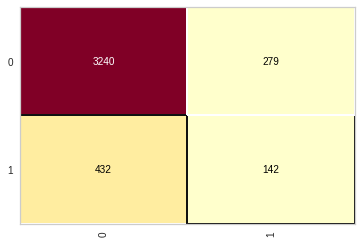

In [29]:
cm_rotten_nominee = ConfusionMatrix(naive_rotten_nominee)
cm_rotten_nominee.fit(X_rotten_oscars_treinamento, Y_rotten_oscars_nominee_treinamento)
cm_rotten_nominee.score(X_rotten_oscars_teste, Y_rotten_oscars_nominee_teste)

#### Claissification Report

In [24]:
print(classification_report(Y_rotten_oscars_nominee_teste, previsoes_rotten_nominee))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3519
           1       0.34      0.25      0.29       574

    accuracy                           0.83      4093
   macro avg       0.61      0.58      0.59      4093
weighted avg       0.81      0.83      0.81      4093



### Naive Bayes Winner

#### Divisão Treinamento e Teste

In [10]:
X_rotten_oscars_treinamento, X_rotten_oscars_teste, Y_rotten_oscars_winner_treinamento, Y_rotten_oscars_winner_teste = train_test_split(X_rotten_oscars, Y_rotten_tomatoes_winner,test_size = 0.25, random_state = 0)

#### Previsões 

In [11]:
naive_rotten_winner = GaussianNB()
naive_rotten_winner.fit(X_rotten_oscars_treinamento, Y_rotten_oscars_winner_treinamento);
previsoes_rotten_winner = naive_rotten_winner.predict(X_rotten_oscars_teste)

#### Acurácia

In [12]:
accuracy_score(Y_rotten_oscars_winner_teste, previsoes_rotten_winner)

0.9022721720009773

#### Matriz de Confusão

In [13]:
confusion_matrix(Y_rotten_oscars_winner_teste, previsoes_rotten_winner)

array([[3646,  233],
       [ 167,   47]])

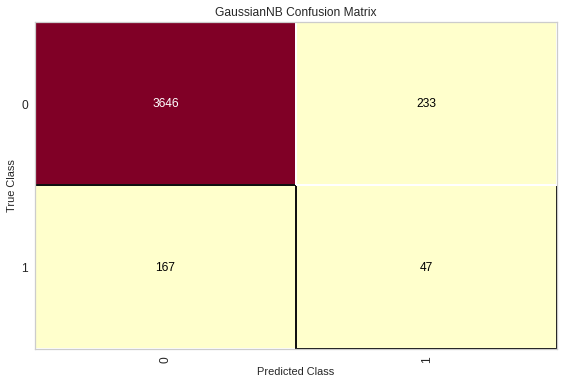

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [16]:
cm_rotten_winner = ConfusionMatrix(naive_rotten_winner)
cm_rotten_winner.fit(X_rotten_oscars_treinamento, Y_rotten_oscars_winner_treinamento)
cm_rotten_winner.score(X_rotten_oscars_teste, Y_rotten_oscars_winner_teste)
cm_rotten_winner.show()

#### Claissification Report

In [17]:
print(classification_report(Y_rotten_oscars_winner_teste, previsoes_rotten_winner))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3879
           1       0.17      0.22      0.19       214

    accuracy                           0.90      4093
   macro avg       0.56      0.58      0.57      4093
weighted avg       0.91      0.90      0.91      4093

